## Sonifications techniques used in the project:

1. Audification

2. Parameter-Mapping Sonififcation (PMson)

3. Wave Space Sonification (WSS)

### Audification and PMSon (A - F)
* (c) 2023 by Thomas Hermann

In [22]:
import numpy as np
import time, os
import matplotlib.pyplot as plt
import sc3nb as scn
import pandas as pd
from pya import *
import scipy
%matplotlib widget

plt.rcParams['figure.figsize'] = (10,3)

In [2]:
sc = scn.startup()

<IPython.core.display.Javascript object>

Starting sclang process... [sclang | start reading ]
[sclang]  compiling class library...
[sclang]  	Found 855 primitives.
[sclang]  	Compiling directory '/Applications/SuperCollider.app/Contents/Resources/SCClassLibrary'
[sclang]  	Compiling directory '/Users/neina/Library/Application Support/SuperCollider/Extensions'
[sclang]  	numentries = 838063 / 12430290 = 0.067
[sclang]  	5505 method selectors, 2258 classes
[sclang]  	method table size 13367560 bytes, big table size 99442320
[sclang]  	Number of Symbols 12375
[sclang]  	Byte Code Size 378538
[sclang]  	compiled 328 files in 1.59 seconds
[sclang]  compile done
[sclang]  localhost : setting clientID to 0.
[sclang]  internal : setting clientID to 0.
[sclang]  Class tree inited in 0.02 seconds
[sclang]  
[sclang]  
[sclang]  *** Welcome to SuperCollider 3.13.0. *** For help type cmd-d.
Done.
Registering OSC /return callback in sclang... [sclang]  sc3> "sc3nb - Registering OSC /return callback".postln; r = r ? (); r.callback = { arg 

In [27]:
#Run to quit server
#sc.exit()

Quitting SCServer... Done.
Exiting sclang... Done.


In [3]:
sc.server.blip()

### Load data and make it a numpy array

In [23]:
# let's load the data into an asig - fot convenient time slicing and channel selection
dn = pd.read_csv("nino3all.csv", delimiter=",", 
                 names=["Year", "SST", "u1", "u2"], 
                 dtype={"Year": int, "SST": float})\
    .set_index("Year").loc[:,["SST"]]

In [24]:
dn.values.squeeze()

array([-0.28293637, -0.311611  , -0.35221283, ...,  0.30720687,
        0.41622542,  0.51111264])

### Audifications

In [25]:
an = Asig(dn.values.squeeze(), sr=1000)

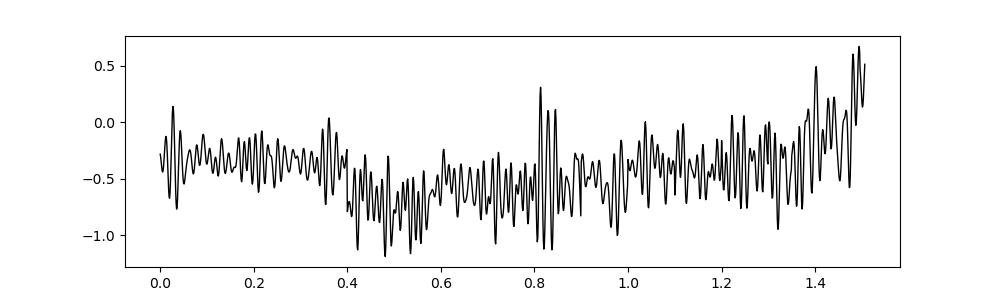

In [27]:
plt.figure(); an.plot(color="k", lw=1) 
an.stereo().play(rate=1);

In [8]:
an.norm(0.5).fade_in(0.02).fade_out(0.02).stereo().play(rate=1);

In [9]:
an.fade_in(0.02).fade_out(0.02).stereo().play(rate=3);

In [10]:
an.fade_in(0.02).fade_out(0.02).stereo().play(rate=4);

### Continuous PMSon

#### PMSon A

In [11]:
def pmson_A(asig, rate=1, decim=1, p0=50):
    syn = scn.Synth("s2", {"freq": 300, "pan": 0, "amp": 0.2})
    for i, v in enumerate(asig[::decim].sig):
        syn.amp = scn.dbamp(scn.linlin(v, -1.2, 0.7, -30, -10))
        syn.pan = 0
        time.sleep(1 / asig.sr * decim / rate)
    syn.free()

In [12]:
pmson_A(an, rate=0.1, decim=1)

[sclang]  r['callback'].value("\"sc3nb - Get SynthDesc of s2\".postln; SynthDescLib.global['s2'].notNil.if({ SynthDescLib.global['s2'].controls.collect( { | control | [control.name, control.rate, control.defaultValue] } ) })", "127.0.0.1", 57131);
[sclang]  sc3nb - Get SynthDesc of s2
[sclang]  -> [ [ freq, control, 400.0 ], [ amp, control, 0.30000001192093 ], [ num, control, 4.0 ], [ pan, control, 0.0 ], [ lg, control, 0.10000000149012 ], [ gate, control, 1.0 ] ]


#### PMSon B

In [13]:
def pmson_B(asig, rate=1, decim=1, p0=50):
    syn = scn.Synth("s2", {"freq": 300, "pan": 0, "amp": 0.2})
    for i, v in enumerate(asig[::decim].sig):
        syn.freq = scn.midicps(p0 + scn.linlin(v, -1.2, 0.7, -10, 30))
        syn.pan = 0
        time.sleep(1 / asig.sr * decim / rate)
    syn.free()

In [14]:
pmson_B(an, rate=0.1, decim=1)

#### PMSon C

In [15]:
def pmson_C(asig, rate=1, decim=1, p0=50):
    syn = scn.Synth("s2", {"freq": 300, "pan": 0, "amp": 0.2}) 
    for i, v in enumerate(asig[::decim].sig):
        syn.amp = scn.dbamp(scn.linlin(v, -1.2, 0.7, -30, -10))
        syn.freq = scn.midicps(p0 + scn.linlin(v, -1.2, 0.7, -10, 30))
        syn.pan = 0
        time.sleep(1 / asig.sr * decim / rate)
    syn.free()

In [16]:
pmson_C(an, rate=0.1, decim=1)

#### PMSon D

In [17]:
def pmson_D(asig, rate=1, decim=1, p0=50):
    syn = scn.Synth("s2", {"freq": 300, "pan": 0, "amp": 0.2})
    for i, v in enumerate(asig[::decim].sig):
        syn.num = scn.linlin(v, -2, 2, 1, 10)
        syn.amp = scn.dbamp(scn.linlin(v, -1.2, 0.7, -30, -10))
        syn.freq = scn.midicps(p0 + scn.linlin(v, -1.2, 0.7, -10, 30))
        syn.pan = 0
        time.sleep(1 / asig.sr * decim / rate)
    syn.free()

In [18]:
pmson_D(an, rate=0.1, decim=1)

In [96]:
sc.server.free_all()

[sclang]  sc3> r['callback'].value("\"sc3nb - Creating SynthDef sc3nb_volumeAmpControl2\".postln; r.tmpSynthDef = SynthDef(\"sc3nb_volumeAmpControl2\", { | volumeAmp = 1, volumeLag = 0.1, gate=1, bus | XOut.ar(bus, Linen.kr(gate, releaseTime: 0.05, doneAction:2), In.ar(bus, 2) * Lag.kr(volumeAmp, volumeLag) ); }); SynthDescLib.global.add(r.tmpSynthDef.asSynthDesc); r.tmpSynthDef.asBytes();", "127.0.0.1", 57136);
[sclang]  sc3nb - Creating SynthDef sc3nb_volumeAmpControl2
[sclang]  -> Int8Array[ 83, 67, 103, 102, 0, 0, 0, 2, 0, 1, 23, 115, 99, 51, 110, 98, 95, 118, 111, 108, 117, 109, 101, 65, 109, 112, 67, 111, 110, 116, 114, 111, 108, 50, 0, 0, 0, 4, 60, 35, -41, 10, 63, -128, 0, 0, 61, 76, -52, -51, 64, 0, 0, 0, 0, 0, 0, 4, 63, -128, 0, 0, 61, -52, -52, -51, 63, -128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 9, 118, 111, 108, 117, 109, 101, 65, 109, 112, 0, 0, 0, 0, 9, 118, 111, 108, 117, 109, 101, 76, 97, 103, 0, 0, 0, 1, 4, 103, 97, 116, 101, 0, 0, 0, 2, 3, 98, 117, 115, 0, 0, 0, 3, 0, 0, 0, 

### Discrete PMSon:

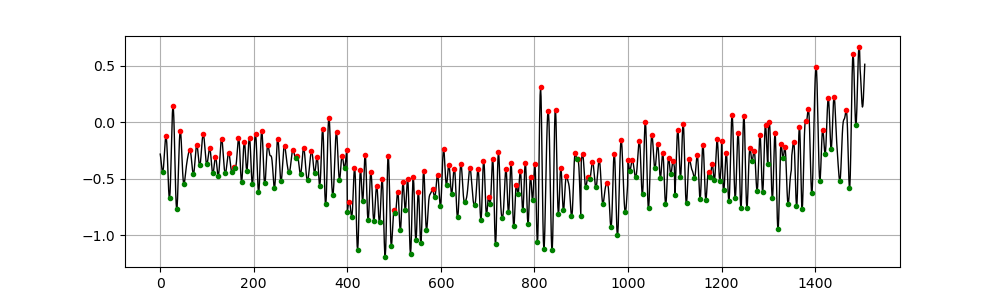

In [19]:
from scipy.signal import find_peaks

# find the maxima and minima (= maxima of -x)
x = an.sig
max_idx, _ = find_peaks(x, height=-10)
min_idx, _ = find_peaks(-x, height=0)

# plot results
plt.figure(); plt.grid()
plt.plot(x, "k", lw=1)
plt.plot(max_idx, x[max_idx], "r.", ms=6)
plt.plot(min_idx, x[min_idx], "g.", ms=6);

#### Event-based Sonification (PMSon E)

In [20]:
queue = scn.TimedQueueSC() #this function allows us to schedule things at specific times

##### Without sharpness settings

In [26]:
an.plot()
x = an.sig
t0 = time.time()
dur = 15
n = x.size
for ma in max_idx:
    onset = scn.linlin(ma, 0, n, 0, dur) #sound happening in time
    freq = 600
    num = 1
    # if x[ma]>0: num = 4
    queue.put_msg(t0 + onset, "/s_new", ["s1", -1, 1, 0, "freq", freq, "amp", 0.3, "dur", 0.05, "pos", 0, "num", num])
for mi in min_idx:
    onset = scn.linlin(mi, 0, n, 0, dur)
    freq = 400
    num = 1
    # if x[mi]<-0.75: num = 4
    queue.put_msg(t0+onset, "/s_new", ["s1", -1, 1, 0, "freq", freq, "amp", 0.3, "dur", 0.05, "pos", 0, "num", num])

##### With sharpness settings

In [25]:
an.plot()
x = an.sig
t0 = time.time()
dur = 20
n = x.size
for ma in max_idx:
    onset = scn.linlin(ma, 0, n, 0, dur) #sound happening in time
    freq = 600
    num = 4
    if x[ma]> 0: num = 7
    queue.put_msg(t0 + onset, "/s_new", ["s1", -1, 1, 0, "freq", freq, "amp", 0.3, "dur", 0.05, "pos", 0, "num", num])
for mi in min_idx:
    onset = scn.linlin(mi, 0, n, 0, dur)
    freq = 400
    num = 1
    if x[mi] < -0.75: num = 1
    queue.put_msg(t0+onset, "/s_new", ["s1", -1, 1, 0, "freq", freq, "amp", 0.3, "dur", 0.05, "pos", 0, "num", num])

#### Musical Notes Mapping Sonification (PMSon F)

In [32]:
notebyidx = [0, 2, 4, 5, 7, 9, 11, 12, 14, 16, 17, 19, 21, 23, 24]

for v in an.sig[-1500::2]: #last 1500 years with step 2, i.e. every second year
    idx = int(scn.linlin(v, -1.2, 1, 0, 15))
    note = 60 + notebyidx[idx]
    freq = scn.midicps(note)
    # let's have more harmonics as we exceed 0 degrees
    num = 1
    if v > 0.0: 
        num = 5
    scn.Synth("s1", {"freq": freq, "dur": 1.6, "amp": 0.1, "att": 0, "num": num})
    time.sleep(0.02)

[sclang]  sc3> r['callback'].value("\"sc3nb - Get SynthDesc of s1\".postln; SynthDescLib.global['s1'].notNil.if({ SynthDescLib.global['s1'].controls.collect( { | control | [control.name, control.rate, control.defaultValue] } ) })", "127.0.0.1", 57134);
[sclang]  sc3nb - Get SynthDesc of s1
[sclang]  -> [ [ freq, control, 400.0 ], [ dur, control, 0.40000000596046 ], [ att, control, 0.0099999997764826 ], [ amp, control, 0.30000001192093 ], [ num, control, 4.0 ], [ pan, control, 0.0 ] ]
